<a href="https://colab.research.google.com/github/nayanraghatate/Machine_Learning_Projects/blob/main/Tesla_Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
1,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
2,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
3,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
4,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000


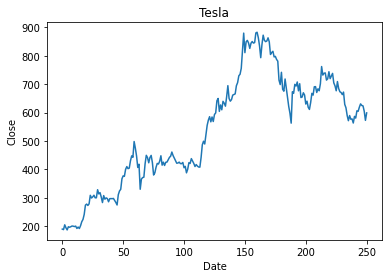

In [3]:
close = data['Close']
ax = close.plot(title = 'Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()


In [4]:
# We need only two columns from this dataset so lets create a new dataframe with only two columns
data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format= True)
data = data[["Date", 'Close']]

In [5]:
# Here we are using facebook Prophet model thus we need to rename the columns
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [9]:
# We have prepared the dataset now lets predict the stock prices of Tesla
model= Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods= 365)
forcast = model.predict(predict)
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-06-08,205.932640,141.654167,270.556154
1,2020-06-09,211.825068,147.497899,273.706439
2,2020-06-10,212.418576,142.739151,278.135970
3,2020-06-11,213.161505,149.051359,269.515757
4,2020-06-12,215.950775,148.559493,281.676501
...,...,...,...,...
611,2022-05-31,32.078370,-544.391149,601.549146
612,2022-06-01,29.277714,-561.893759,611.264873
613,2022-06-02,26.626477,-553.424284,624.025881
614,2022-06-03,26.021583,-572.379684,605.120043


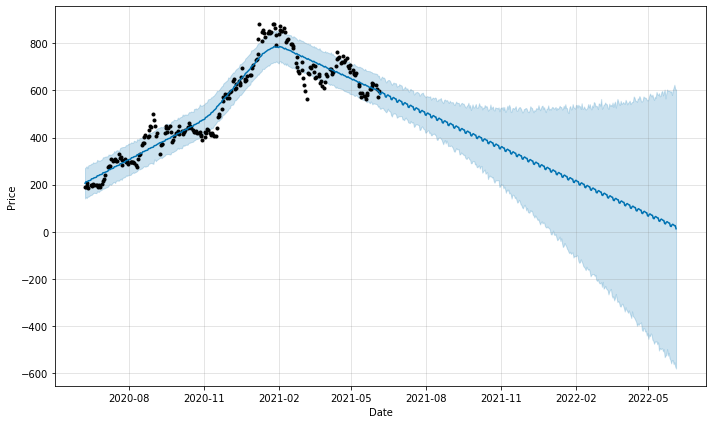

In [11]:
graph = model.plot(forcast, xlabel = 'Date', ylabel= 'Price')

In [ ]:
''' Conclusion:
It seems like Tesla’s stock prices will decrease in the coming future if they don’t come up 
with a new idea of representing their vision. This may be possible as other companies have also 
started manufacturing electric vehicles at a very low price as compared to Tesla.'''